# Purpose
I want to see if we can improve model segmentation by doing a few extra tunes on the segment anything mask generator

To do this, I'll use training images as reference and then plot them against the default SAM results

In [6]:
from facet_ml.segmentation.segmenter import ImageSegmenter
import glob
import matplotlib.pyplot as plt

In [5]:
image_list = [
    "/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/4 nM 1.bmp",
    "/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/4 nM 5.bmp",
    "/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 3.bmp",
    "/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 6.bmp",
    "/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/4 nM 9.bmp"
]

IS = ImageSegmenter(threshold_mode="segment_anything")

# Recursively look through and grab each of the marker images
markers_base_dict = {}

for image_path in image_list:
    IS.input_path = image_path
    IS.process_images()
    markers_base_dict[image_path] = IS.markers2

fig, ax = plt.subplots(ncols=len(markers_base_dict),figsize=(20,4))
for ii,(key,val) in enumerate(markers_base_dict.items()):
    ax[ii].imshow(val)


NameError: name 'plt' is not defined

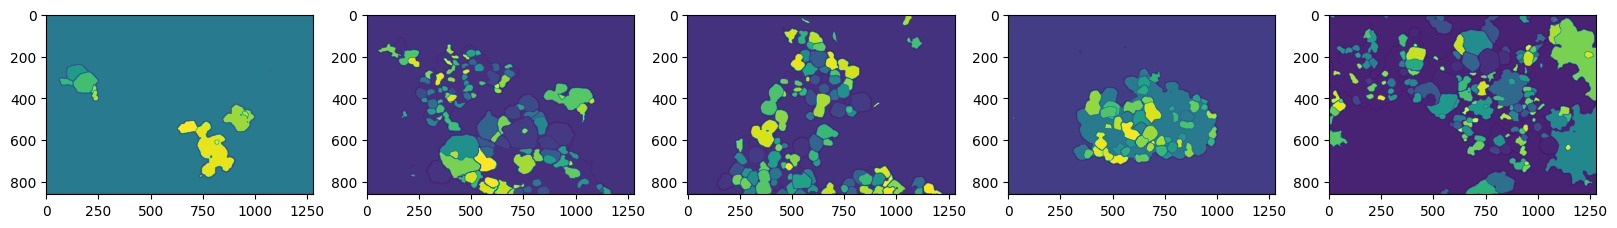

In [7]:
fig, ax = plt.subplots(ncols=len(markers_base_dict),figsize=(20,4))
for ii,(key,val) in enumerate(markers_base_dict.items()):
    ax[ii].imshow(val)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

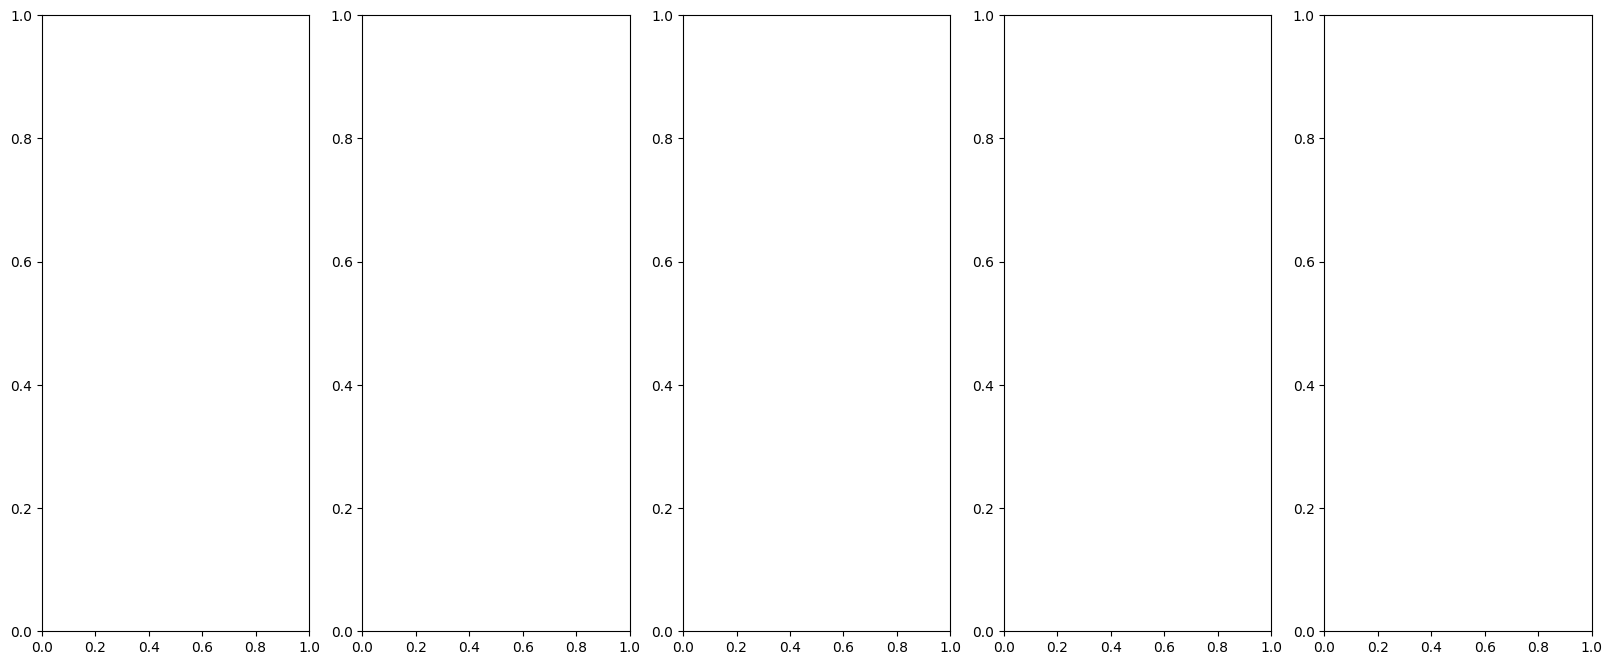

In [26]:
'''
        model (Sam): The SAM model to use for mask prediction.
          points_per_side (int or None): The number of points to be sampled
            along one side of the image. The total number of points is
            points_per_side**2. If None, 'point_grids' must provide explicit
            point sampling.
          points_per_batch (int): Sets the number of points run simultaneously
            by the model. Higher numbers may be faster but use more GPU memory.
          pred_iou_thresh (float): A filtering threshold in [0,1], using the
            model's predicted mask quality.
          stability_score_thresh (float): A filtering threshold in [0,1], using
            the stability of the mask under changes to the cutoff used to binarize
            the model's mask predictions.
          stability_score_offset (float): The amount to shift the cutoff when
            calculated the stability score.
          box_nms_thresh (float): The box IoU cutoff used by non-maximal
            suppression to filter duplicate masks.
          crop_n_layers (int): If >0, mask prediction will be run again on
            crops of the image. Sets the number of layers to run, where each
            layer has 2**i_layer number of image crops.
          crop_nms_thresh (float): The box IoU cutoff used by non-maximal
            suppression to filter duplicate masks between different crops.
          crop_overlap_ratio (float): Sets the degree to which crops overlap.
            In the first crop layer, crops will overlap by this fraction of
            the image length. Later layers with more crops scale down this overlap.
          crop_n_points_downscale_factor (int): The number of points-per-side
            sampled in layer n is scaled down by crop_n_points_downscale_factor**n.
          point_grids (list(np.ndarray) or None): A list over explicit grids
            of points used for sampling, normalized to [0,1]. The nth grid in the
            list is used in the nth crop layer. Exclusive with points_per_side.
          min_mask_region_area (int): If >0, postprocessing will be applied
            to remove disconnected regions and holes in masks with area smaller
            than min_mask_region_area. Requires opencv.
          output_mode (str): The form masks are returned in. Can be 'binary_mask',
            'uncompressed_rle', or 'coco_rle'. 'coco_rle' requires pycocotools.
            For large resolutions, 'binary_mask' may consume large amounts of
            memory.
'''
sam_kwargs = {
    #"crop_n_layers":1,
    #"min_mask_region_area":4
    "points_per_side":64
}

IS_mod = ImageSegmenter(threshold_mode="segment_anything",sam_kwargs=sam_kwargs)

# Recursively look through and grab each of the marker images
markers_mod_dict = {}

for image_path in image_list:
    IS_mod.input_path = image_path
    IS_mod.process_images()
    markers_mod_dict[image_path] = IS_mod.markers2


fig_mod, ax_mod = plt.subplots(ncols=len(markers_mod_dict),figsize=(20,8))
for ii,(key,val) in enumerate(markers_base_dict.items()):
    ax_mod[0,ii].imshow(val)
for ii,(key,val) in enumerate(markers_mod_dict.items()):
    ax_mod[1,ii].imshow(val)

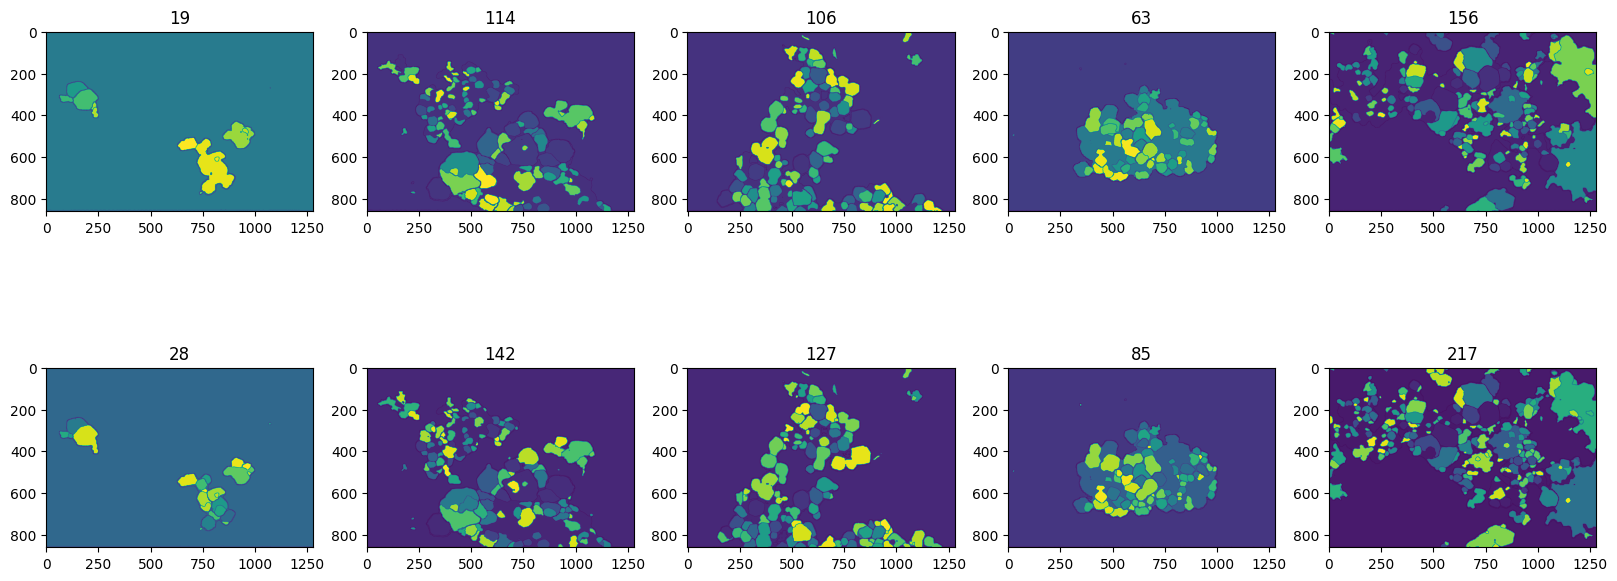

In [27]:
import numpy as np
fig_mod, ax_mod = plt.subplots(nrows=2,ncols=len(markers_mod_dict),figsize=(20,8))
for ii,(key,val) in enumerate(markers_base_dict.items()):
    
    ax_mod[0,ii].imshow(val)
    ax_mod[0,ii].set_title(len(np.unique(val)))
for ii,(key,val) in enumerate(markers_mod_dict.items()):
    ax_mod[1,ii].imshow(val)
    ax_mod[1,ii].set_title(len(np.unique(val)))
fig.savefig("pps-64.png")